<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Session 06: Logistic Regression (Iris Dataset)</h3>
    <h4 align="center"><a href="https://www.linkedin.com/public-profile/settings?trk=d_flagship3_profile_self_view_public_profile&lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_self_edit_top_card%3BhFw1W2M%2FTMCAYZp6pzKt1Q%3D%3D">Seyed Mohammad Sajadi</a></h4></div>

<img src = "https://i1.wp.com/www.uniquenewsonline.com/wp-content/uploads/2020/09/Linear-Regression-vs-Logistic-Regression.png?w=1280&ssl=1" width=50%>

## What is Logistic Regression?

It is used to determine the value of a continuous dependent variable. 
Logistic Regression is generally used for classification purposes. Unlike `Linear Regression`, the dependent variable can take a limited number of values only i.e, the dependent variable is categorical. When the number of possible outcomes is only two it is called Binary Logistic Regression.

<img src = "https://miro.medium.com/max/1400/0*_5zUFVIAXwzBSgAR.png" width=50%>

* In Linear Regression, the output is the weighted sum of inputs. Logistic Regression is a generalized Linear Regression in the sense that we don’t output the weighted sum of inputs directly, but we pass it through a function that can map any real value between 0 and 1.

<img src = "https://files.virgool.io/upload/users/136298/posts/q69uus9qkeva/cbimd9voqvaf.png">

## About Iris Dataset

We will use the well known Iris data set. It contains 3 classes of 50 instances each, where each class refers to a type of iris plant. To simplify things, we take just the first two feature columns. Also, the two non-linearly separable classes are labeled with the same category, ending up with a binary classification problem.

<img src = "https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png">

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Logistic Regression - Iris Dataset

logistic regression would, in this synthetic dataset, classify values as either 0 or 1, i.e. class one or two, using the logistic curve.

<img src = "https://miro.medium.com/max/798/0*2c7voFri9cIXGrc4">

In [2]:
iris = pd.read_csv('Iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris.drop("Id", axis=1, inplace = True)

C:\Users\se7en\AppData\Roaming\Python\Python39\site-packages\seaborn\relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
C:\Users\se7en\AppData\Roaming\Python\Python39\site-packages\seaborn\relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
C:\Users\se7en\AppData\Roaming\Python\Python39\site-packages\seaborn\relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
C:\Users\se7en\AppData\Roaming\Python\Python39\site-packages\

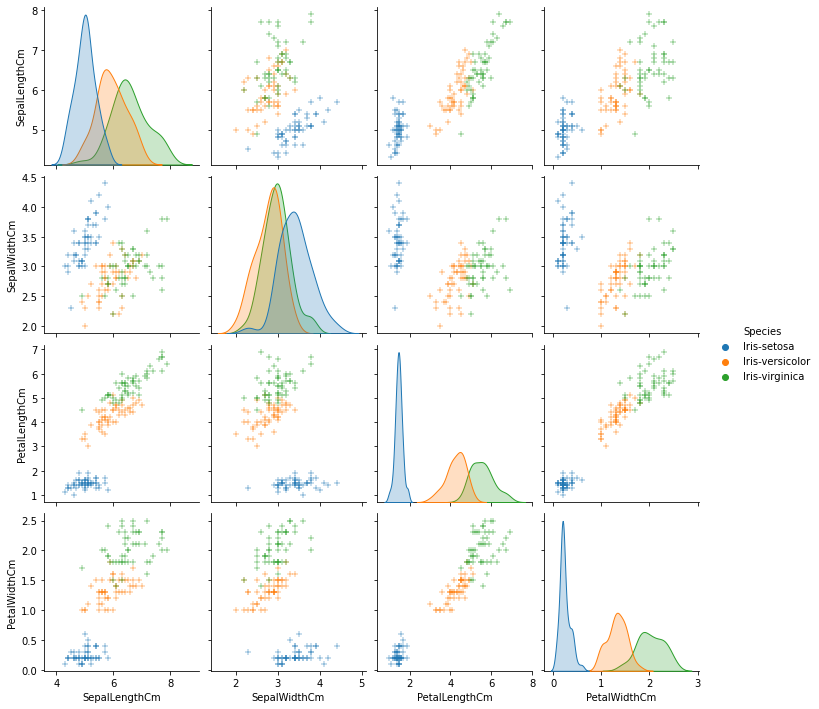

In [7]:
g = sns.pairplot(iris, hue='Species', markers='+')
plt.show()

In [8]:
iris.shape

(150, 5)

<AxesSubplot:>

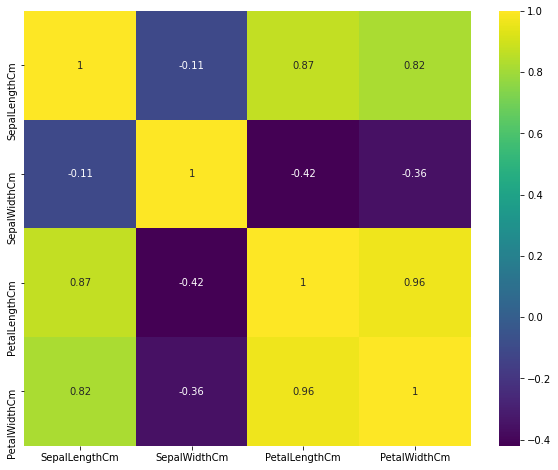

In [9]:
corr = iris.corr()
plt.figure(figsize=(10,8)) 
sns.heatmap(corr, cmap='viridis', annot=True)

## Training and Test 

Select any algorithm based on the problem (classification or regression) whatever you feel may be good. Then pass the training dataset to the algorithm to train it. We use the .fit() method Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method. We then check the accuracy by passing the predicted outcome and the actual output to the model.

In [10]:
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
from sklearn import metrics # for checking the model accuracy

In [11]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
# X = iris.iloc[:,0:4]
X = iris.drop(['Species'], axis=1)
y = iris['Species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


In [13]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


In [15]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [16]:
y_pred = logreg.predict(X_test)

<img src="https://blog.cambridgecoaching.com/hubfs/One.png" width=50% />

In [17]:
X_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
82,5.8,2.7,3.9,1.2
134,6.1,2.6,5.6,1.4
114,5.8,2.8,5.1,2.4
42,4.4,3.2,1.3,0.2
109,7.2,3.6,6.1,2.5
57,4.9,2.4,3.3,1.0
1,4.9,3.0,1.4,0.2
70,5.9,3.2,4.8,1.8
25,5.0,3.0,1.6,0.2
84,5.4,3.0,4.5,1.5


In [18]:
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-set

In [19]:
y_test

82     Iris-versicolor
134     Iris-virginica
114     Iris-virginica
42         Iris-setosa
109     Iris-virginica
57     Iris-versicolor
1          Iris-setosa
70     Iris-versicolor
25         Iris-setosa
84     Iris-versicolor
66     Iris-versicolor
133     Iris-virginica
102     Iris-virginica
107     Iris-virginica
26         Iris-setosa
23         Iris-setosa
123     Iris-virginica
130     Iris-virginica
21         Iris-setosa
12         Iris-setosa
71     Iris-versicolor
128     Iris-virginica
48         Iris-setosa
72     Iris-versicolor
88     Iris-versicolor
148     Iris-virginica
74     Iris-versicolor
96     Iris-versicolor
63     Iris-versicolor
132     Iris-virginica
39         Iris-setosa
53     Iris-versicolor
79     Iris-versicolor
10         Iris-setosa
50     Iris-versicolor
49         Iris-setosa
43         Iris-setosa
135     Iris-virginica
40         Iris-setosa
115     Iris-virginica
142     Iris-virginica
69     Iris-versicolor
17         Iris-setosa
46         

In [20]:
print('The accuracy of Logistic Regression is: ', (metrics.accuracy_score(y_test, y_pred)))

The accuracy of Logistic Regression is:  0.9833333333333333


In [21]:
pd.crosstab(logreg.predict(X),y)

Species,Iris-setosa,Iris-versicolor,Iris-virginica
row_0,,,
Iris-setosa,50,0,0
Iris-versicolor,0,47,1
Iris-virginica,0,3,49
